Assignment 07.1 (Direction of principal components, 2 points)

simple example:

In [5]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print('# define a matrix A')
print(A)
# calculate the mean of each column
print('calculate the mean of each column')
M = mean(A.T, axis=1)
print(M)
# center columns by subtracting column means
print('center columns by subtracting column means')
C = A - M
print(C)
# calculate covariance matrix of centered matrix
V = cov(C.T)
print('calculate covariance matrix of centered matrix =',V)
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print('Eigenvectors')
print(vectors)
print('Eigenvalues')
print(values)
# project data
P = vectors.T.dot(C.T)
print(P.T)

# define a matrix A
[[1 2]
 [3 4]
 [5 6]]
calculate the mean of each column
[3. 4.]
center columns by subtracting column means
[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]
calculate covariance matrix of centered matrix = [[4. 4.]
 [4. 4.]]
Eigenvectors
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Eigenvalues
[8. 0.]
[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


Eigenvectors and values exist in pairs: every eigenvector has a corresponding eigenvalue. An eigenvector is a direction, in the example above the eigenvector was the direction of the line (vertical, horizontal, 45 degrees etc.) . An eigenvalue is a number, telling you how much variance there is in the data in that direction, in the example above the eigenvalue is a number telling us how spread out the data is on the line. The eigenvector with the highest eigenvalue is therefore the principal component.Okay, so even though in the last example I could point my line in any direction, it turns out there are not many eigenvectors/values in a data set. In fact the amount of eigenvectors/values that exist equals the number of dimensions the data set has. Say i’m measuring age and hours on the internet. there are 2 variables, it’s a 2 dimensional data set, therefore there are 2 eigenvectors/values. If i’m measuring age, hours on internet and hours on mobile phone there’s 3 variables, 3-D data set, so 3 eigenvectors/values. The reason for this is that eigenvectors put the data into a new set of dimensions, and these new dimensions have to be equal to the original amount of dimensions. This sounds complicated, but again an example should make it clear.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
N = 1000
xTrue = np.linspace(0, 1000, N)
yTrue = 3 * xTrue
ytrue=np.linspace(0, 1000, N)
xData = xTrue + np.random.normal(0, 100, N)
yData = yTrue + np.random.normal(0, 100, N)
xData = np.reshape(xData, (N, 1))
yData = np.reshape(yData, (N, 1))
data = np.hstack((xData, yData))

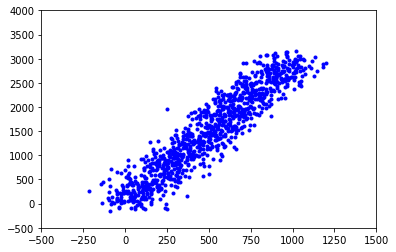

In [7]:
plt.plot(xData,yData,'b.')
plt.ylim(-500,4000)
plt.xlim(-500,1500)
plt.show()

In [8]:
data  = np.hstack((xData, yData))
mu = data.mean(axis=0)
data = data - mu


In [9]:
eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
projected_data = np.dot(data, eigenvectors)
sigma = projected_data.std(axis=0).mean()
print('eigenvector is',eigenvectors)
print('eigenvalues is',eigenvalues)

eigenvector is [[-0.31414243 -0.94937587]
 [-0.94937587  0.31414243]]
eigenvalues is [29082.09489367  3288.35669953]


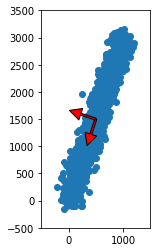

In [10]:
fig, ax = plt.subplots()
ax.scatter(xData, yData)
for axis in eigenvectors:
    start, end = mu, mu + sigma * axis
    ax.annotate(
        '', xy=end, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='red', width=2.0))
ax.set_aspect('equal')
plt.ylim(-500,3500)
plt.xlim(-500,1500)
plt.show()

Assignment 07.2 (Expressing the variance, 2 points)

In [11]:
import numpy as np
print("assume that the age of people is between 15 and 100")
age=np.random.randint(low=15,high=70, size=1000)
print("assume that the time duration in between 0 and 20 hours in one day")
timeGame=np.random.uniform(low=0, high=5, size=1000)
timeGame=timeGame.round(decimals=2)
timeFace=np.random.uniform(low=0, high=5, size=1000)
timeFace=timeFace.round(decimals=2)
timeSport=np.random.uniform(low=0, high=5, size=1000)
timeSport=timeSport.round(decimals=2)

assume that the age of people is between 15 and 100
assume that the time duration in between 0 and 20 hours in one day


In [12]:
survey=np.column_stack((age,timeGame,timeFace,timeSport))
survey1=np.column_stack((age,timeGame))
survey2=np.column_stack((age,timeFace))
survey3=np.column_stack((timeSport,timeFace))

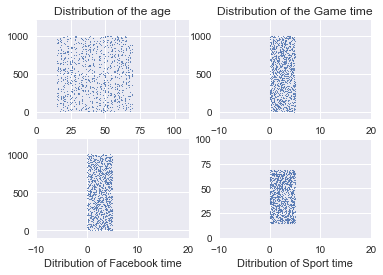

In [19]:
N = 1000
t=np.arange(N)
plt.figure(1)
plt.subplot(2,2,1)
plt.title('Distribution of the age')
plt.scatter(survey[:,0],t,s=0.5)
plt.ylim(-100,1200)
plt.xlim(0,110)
plt.subplot(2,2,2)
plt.title('Distribution of the Game time')
plt.scatter(survey[:,1],t,s=0.5)
plt.ylim(-100,1200)
plt.xlim(-10,20)
plt.subplot(2,2,3)
plt.scatter(survey[:,2],t,s=0.5)
plt.xlabel('Ditribution of Facebook time')
plt.ylim(-100,1200)
plt.xlim(-10,20)
plt.subplot(2,2,4)
from sklearn.decomposition import PCA
plt.scatter(survey[:,3],survey[:,0],s=0.5)
plt.xlabel('Ditribution of Sport time')
plt.ylim(0,100)
plt.xlim(-10,20)
plt.show()


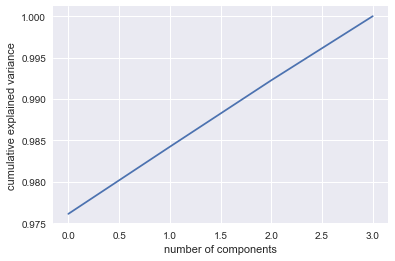

In [20]:
pca = PCA().fit(survey)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [21]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(survey)
print(survey.shape)
print(projected.shape)

(1000, 4)
(1000, 2)


/home/masoud/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


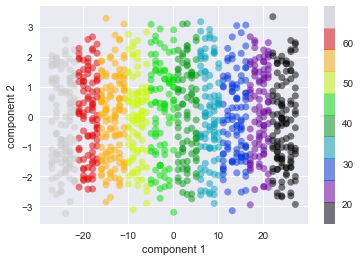

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.scatter(projected[:, 0], projected[:, 1],
              c=survey[:,0],edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [211]:
# calculate the mean of each column
print('calculate the mean of each column')
M = mean(survey, axis=0)
print(M)
# center columns by subtracting column means
print('center columns by subtracting column means')
C = survey - M
print(C)
# calculate covariance matrix of centered matrix
V = cov(C)
print('calculate covariance matrix of centered matrix =',V)
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print('Eigenvectors')
print(vectors)
print('Eigenvalues')
print(values)


calculate the mean of each column
[42.227    2.44233  2.4687   2.50504]
center columns by subtracting column means
[[-22.227     0.38767  -0.9887    0.70496]
 [ 21.773     0.97767   0.5913   -2.01504]
 [-26.227     0.05767   0.7813    1.46496]
 ...
 [ -5.227    -1.50233   1.9413    1.81496]
 [-12.227    -2.10233  -0.6887   -0.16504]
 [ 15.773     0.94767   0.4113   -0.48504]]
calculate covariance matrix of centered matrix = [[ 124.43558559 -122.54010242  150.30573825 ...   32.8382909
    62.5150199   -86.29912482]
 [-122.54010242  121.90663457 -148.64088309 ...  -33.97798878
   -62.46548477   85.60521217]
 [ 150.30573825 -148.64088309  182.51235759 ...   41.1320769
    76.32333924 -104.81720549]
 ...
 [  32.8382909   -33.97798878   41.1320769  ...   11.47715454
    18.04910855  -23.85931118]
 [  62.5150199   -62.46548477   76.32333924 ...   18.04910855
    32.26315422  -43.95470717]
 [ -86.29912482   85.60521217 -104.81720549 ...  -23.85931118
   -43.95470717   60.26998977]]
Eigenvecto

[[-9.99999667e-01  8.16539967e-04]
 [ 8.16539967e-04  9.99999667e-01]]
[239.13876766   2.08663942]


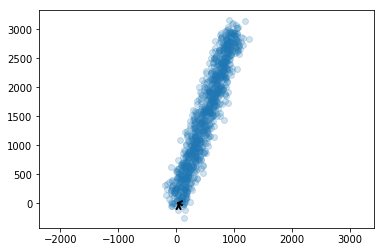

In [196]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(survey1)
print(pca.components_)
print(pca.explained_variance_)
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [202]:
pca = PCA(n_components=2)
pca.fit(survey1)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1000, 2)
transformed shape: (1000, 2)


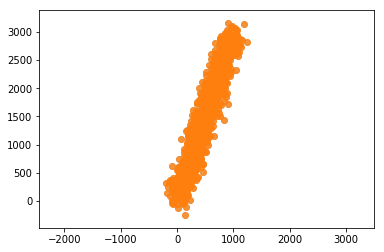

In [203]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

Assignment 07.3 (Eigenfaces in sklearn, 1+1+1+2+2 points)

In [23]:
"""
===================================================
Faces recognition example using eigenfaces and SVMs
===================================================

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

.. _LFW: http://vis-www.cs.umass.edu/lfw/

Expected results for the top 5 most represented people in the dataset::

                     precision    recall  f1-score   support

  Gerhard_Schroeder       0.91      0.75      0.82        28
    Donald_Rumsfeld       0.84      0.82      0.83        33
         Tony_Blair       0.65      0.82      0.73        34
       Colin_Powell       0.78      0.88      0.83        58
      George_W_Bush       0.93      0.86      0.90       129

        avg / total       0.86      0.84      0.85       282



"""
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import RandomizedPCA
from sklearn.svm import SVC

/home/masoud/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/masoud/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [24]:
print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


Faces recognition example using eigenfaces and SVMs

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

.. _LFW: http://vis-www.cs.umass.edu/lfw/

Expected results for the top 5 most represented people in the dataset::

                     precision    recall  f1-score   support

  Gerhard_Schroeder       0.91      0.75      0.82        28
    Donald_Rumsfeld       0.84      0.82      0.83        33
         Tony_Blair       0.65      0.82      0.73        34
       Colin_Powell       0.78      0.88      0.83        58
      George_W_Bush       0.93      0.86      0.90       129

        avg / total       0.86      0.84      0.85       282






In [25]:
###############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [216]:
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [26]:
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(966, 1850)
(322, 1850)
(966,)
(322,)


In [220]:
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time()-t0))

Extracting the top 150 eigenfaces from 966 faces
done in 0.119s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.016s


/home/masoud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


In [30]:
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='auto'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set


NameError: name 'X_train_pca' is not defined

In [29]:
# Train a SVM classification model

from sklearn.grid_search import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(clf, param_grid)
clf = GridSearchCV(SVC(kernel='rbf', class_weight='auto'), param_grid)
clf = clf.fit(X_train_pca, y_train)
%time grid.fit(X_train_pca,y_train)
print(grid.best_params_)




NameError: name 'clf' is not defined

Using another Method due to Error

In [31]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [32]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(150)
pca.fit(faces.data)

/home/masoud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


RandomizedPCA(copy=True, iterated_power=2, n_components=150,
       random_state=None, whiten=False)

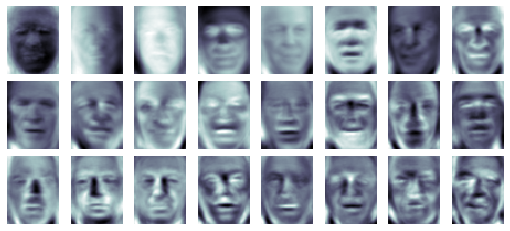

In [33]:
import numpy as np
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

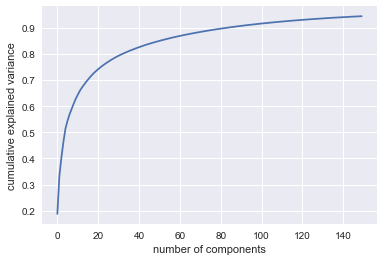

In [34]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [35]:
# Compute the components and projected faces
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

/home/masoud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


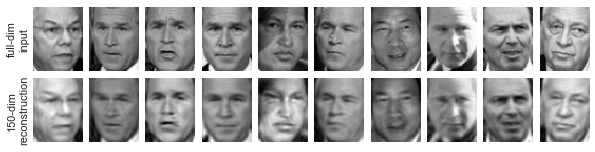

In [36]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

Example of Support Vector Machine(SVM)

In [37]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


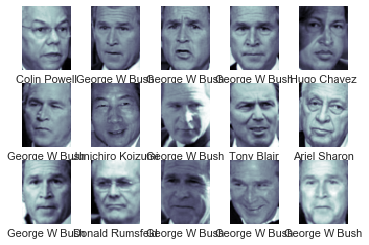

In [38]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [39]:
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

/home/masoud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


In [40]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [41]:
from sklearn.grid_search import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

/home/masoud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/home/masoud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/home/masoud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver=

/home/masoud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/home/masoud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/home/masoud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver=

/home/masoud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/home/masoud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/home/masoud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver=

CPU times: user 41.7 s, sys: 1.08 s, total: 42.7 s
Wall time: 24.1 s
{'svc__C': 5, 'svc__gamma': 0.001}


CPU times: user 41.7 s, sys: 1.08 s, total: 42.7 s
Wall time: 24.1 s
{'svc__C': 5, 'svc__gamma': 0.001}

In [42]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

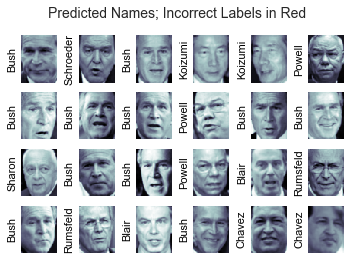

In [43]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);


In [44]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.87      0.72        15
     Colin Powell       0.82      0.88      0.85        68
  Donald Rumsfeld       0.72      0.84      0.78        31
    George W Bush       0.98      0.81      0.89       126
Gerhard Schroeder       0.75      0.78      0.77        23
      Hugo Chavez       0.88      0.70      0.78        20
Junichiro Koizumi       0.80      1.00      0.89        12
       Tony Blair       0.83      0.95      0.89        42

      avg / total       0.86      0.85      0.85       337

